# **EXPLORATORY ANALYSIS**

## Objectives

* Explore patterns in survival time and mortality status across both cohorts.
* Identify variable distributions and early trends to inform later modeling.
* Support hypothesis development through visual exploratory data analysis (EDA).

## Inputs

* data/cleaned/discovery_clean.csv
* data/cleaned/validation_clean.csv 

## Outputs

* Visual summaries of survival times, event distribution, and other key features.
* Initial insights on group differences by categorical variables.
* Cleaned visuals to support overall project objectives and dashboard.

## Additional Comments

* Use of matplotlib, seaborn, and plotly for flexibility and compliance with assessment requirements.
* Cohorts will be analyzed side-by-side to assess data stability.



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\petal\\Downloads\\CI-DBC\\vscode-projects\\clinical-survival-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\petal\\Downloads\\CI-DBC\\vscode-projects\\clinical-survival-analysis'

# Section 1

# Survival Time Distribution

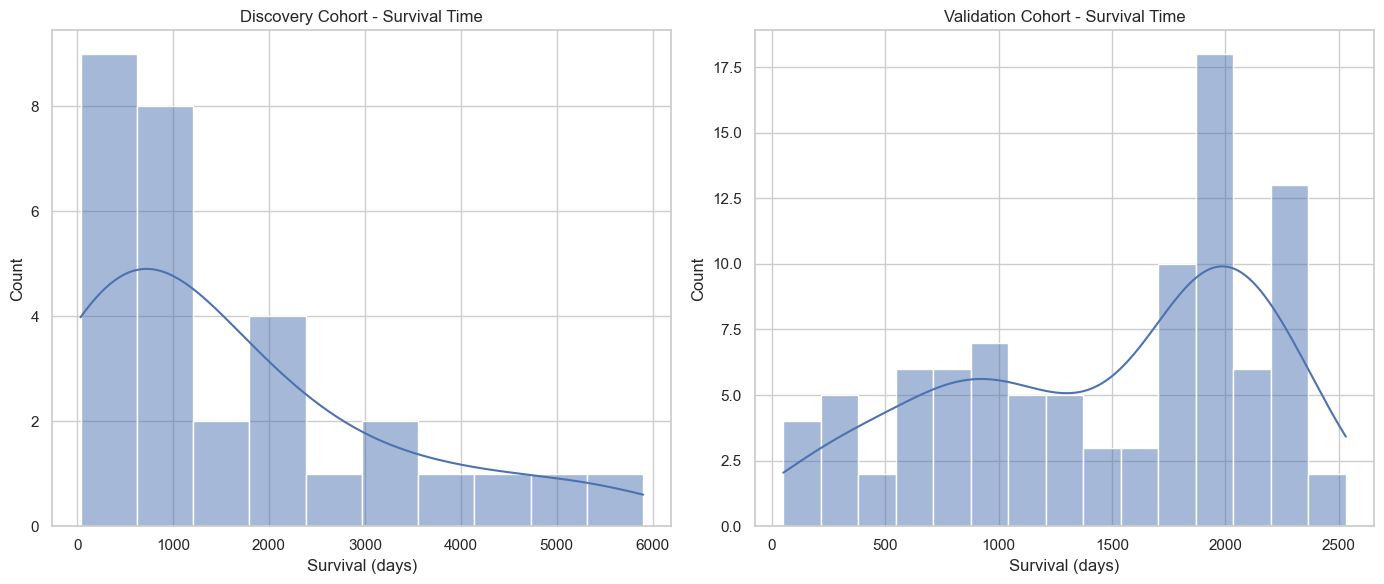

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load datasets
discovery = pd.read_csv("data/cleaned/discovery_clean.csv")
validation = pd.read_csv("data/cleaned/validation_clean.csv")

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(discovery["Time"], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Discovery Cohort - Survival Time")
axes[0].set_xlabel("Survival (days)")

sns.histplot(validation["Survival time (days)"], kde=True, bins=15, ax=axes[1])
axes[1].set_title("Validation Cohort - Survival Time")
axes[1].set_xlabel("Survival (days)")

plt.tight_layout()
plt.show()


### Survival Time Distribution

**Purpose:**  
To visualize the distribution of survival time (in days) for both cohorts. This helps reveal skewness, central tendency, and potential outliers.

**Output Insight:**  
Discovery Cohort
* The distribution is right-skewed, with most patients having survival times below ~1500 days.
* A long tail suggests a few long-term survivors.

Validation Cohort
* The distribution appears more bimodal, possibly indicating different subgroups or clinical characteristics.
* Peaks are evident around 1000 and 2000 days.


# Explore Survival Time by Disease Stage

## Simplify Stage Variable for Interpretation

The original Stage variable in the discovery dataset was one-hot encoded into multiple binary columns (Stage_I, Stage_II, etc.). To enhance interpretability for a non-clinical audience, this was simplified into two broad groups:

Early Stage: Stage I and II

Late Stage: Stage III and IV

This helps streamline analysis and visualization, and is commonly used in clinical summaries

In [5]:
# Simplify stage: Group I/II as 'Early', III/IV as 'Late'
discovery['Simplified_Stage'] = discovery.apply(
    lambda row: 'Late' if row.get('Stage_III', 0) == 1 or row.get('Stage_IV', 0) == 1 else 'Early',
    axis=1
)


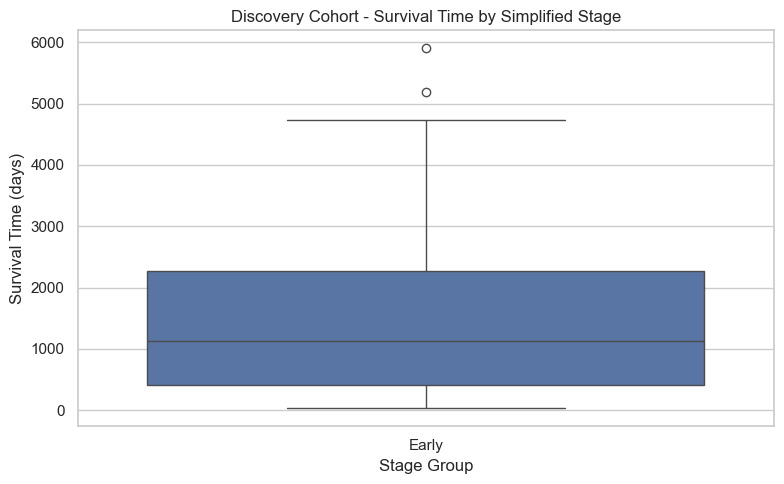

In [6]:
# Plot survival time by simplified stage group
plt.figure(figsize=(8, 5))
sns.boxplot(x='Simplified_Stage', y='Time', data=discovery)
plt.title("Discovery Cohort - Survival Time by Simplified Stage")
plt.xlabel("Stage Group")
plt.ylabel("Survival Time (days)")
plt.tight_layout()
plt.show()


### Check for Late-Stage (Stage III/IV) Entries in the Discovery Cohort

In the cleaned discovery dataset, only the early-stage group appeared in the survival time distribution above. To confirm this observation, the presence of one-hot encoded columns Stage_III and Stage_IV was checked, along with whether these columns contained any entries with a value of 1 (indicating late-stage cases).

In [7]:
# Check for presence of Stage III and IV
print("Stage III count:", discovery['Stage_III'].sum() if 'Stage_III' in discovery else 'Not found')
print("Stage IV count:", discovery['Stage_IV'].sum() if 'Stage_IV' in discovery else 'Not found')


Stage III count: Not found
Stage IV count: Not found


In [8]:
print("Stage III count:", 'Stage_III' in validation.columns)
print("Stage IV count:", 'Stage_IV' in validation.columns)


Stage III count: False
Stage IV count: False


In [9]:
print(validation.columns.tolist())


['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)', 'Tumor size (cm)', 'Grade', 'Age', 'Pack per year', 'batch', 'EGFR', 'KRAS', 'Stage (TNM 8th edition)_IA3', 'Stage (TNM 8th edition)_IB', 'Stage (TNM 8th edition)_IIA', 'Stage (TNM 8th edition)_IIB', 'Stage (TNM 8th edition)_IIIA', 'Stage (TNM 8th edition)_IIIB', 'Stage (TNM 8th edition)_IVA', 'Stage (TNM 8th edition)_Recurrence', 'Sex_Male', 'Type.Adjuvant_Chemorad', 'Type.Adjuvant_No_Adjuvant_Therapy', 'Type.Adjuvant_XRT', 'EGFR_status_Wild-type', 'KRAS_status_Wild-type', 'Cigarette_Former', 'Cigarette_Never']


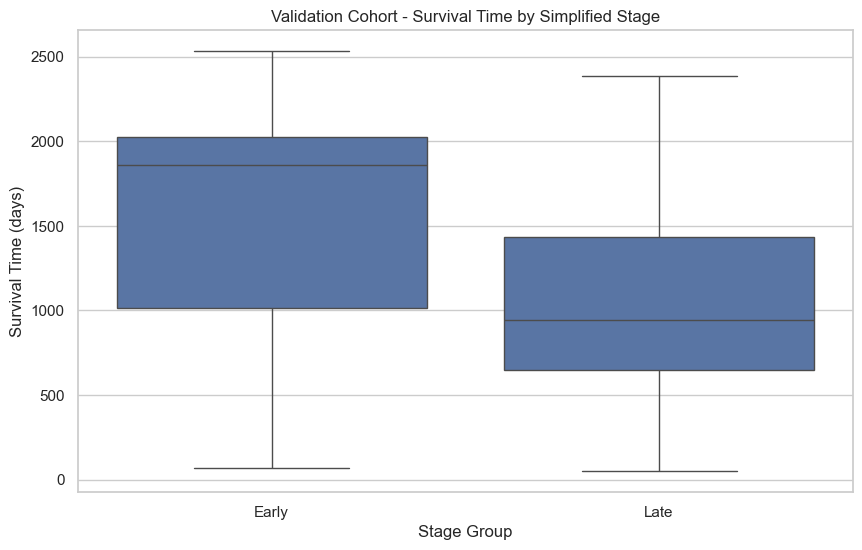

In [10]:
# Create simplified disease stage groupings based on column names
# Step 1: Create Stage_Group
def determine_stage(row):
    early = ['Stage (TNM 8th edition)_IA3', 'Stage (TNM 8th edition)_IB', 
             'Stage (TNM 8th edition)_IIA', 'Stage (TNM 8th edition)_IIB']
    late = ['Stage (TNM 8th edition)_IIIA', 'Stage (TNM 8th edition)_IIIB', 
            'Stage (TNM 8th edition)_IVA']
    
    for col in early:
        if row.get(col, 0) == 1:
            return 'Early'
    for col in late:
        if row.get(col, 0) == 1:
            return 'Late'
    return 'Unknown'

validation["Stage_Group"] = validation.apply(determine_stage, axis=1)

# Step 2: Filter out 'Unknown'as it represents just a small portion of the data and is not very meaningful for the analysis.
validation_filtered = validation[validation["Stage_Group"] != "Unknown"]

# Step 3: Plot using the filtered dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x="Stage_Group", y="Survival time (days)", data=validation_filtered)
plt.title("Validation Cohort - Survival Time by Simplified Stage")
plt.xlabel("Stage Group")
plt.ylabel("Survival Time (days)")
plt.show()



This box plot compares survival time (in days) between patients in the Early and Late stage groups within the **validation** cohort. Patients diagnosed at an earlier stage generally exhibited longer survival times, as indicated by the higher median and wider interquartile range. In contrast, those in the Late stage group had shorter survival durations on average, suggesting the potential prognostic value of disease stage at diagnosis.

---

# Section 2

# Focus on KRAS Mutation Status
Among the two genetic markers available in the dataset, KRAS and EGFR, KRAS mutation status was selected for closer analysis due to its higher variability and greater representation in the cohort. While EGFR mutations were mostly absent or negative in the data, KRAS status showed a broader distribution, offering more meaningful comparisons. Additionally, KRAS mutations are commonly studied in cancer research for their potential role in influencing treatment response and survival outcomes. Focusing on KRAS therefore allows the analysis to explore patterns that may have greater interpretive value in this specific dataset.

# Simplifying KRAS Mutation Status
To prepare for visualising KRAS mutation status in the validation cohort, the existing mutation data was simplified into a binary format. A new label was created to categorise each entry as either "Mutated" or "Wild-type" based on the KRAS status column. This simplification enables clearer grouping in subsequent plots.

In [11]:
# Create a simplified KRAS status label directly
validation["KRAS_Status_Label"] = validation["KRAS_status_Wild-type"].apply(
    lambda x: "Wild-type" if x == 1 else "Mutated"
)



In [12]:
import plotly.express as px

# Filter out missing values
validation_kras = validation[validation["KRAS_Status_Label"].notna()]

# Create plot
fig = px.box(
    validation_kras,
    x="KRAS_Status_Label",
    y="Survival time (days)",
    title="Validation Cohort - Survival Time by KRAS Mutation Status",
    labels={"KRAS_Status_Label": "KRAS Status", "Survival time (days)": "Survival Time (days)"}
)
fig.show()


Interpretation of KRAS Mutation Status and Survival Time (Validation Cohort)
This chart shows how long patients lived based on whether they had a change (mutation) in the KRAS gene or not. Patients without the mutation (wild-type) generally lived longer, on average, than those with the mutation. The range of survival times was also slightly wider in the group without the mutation, meaning some lived longer than others. This may suggest that having a KRAS mutation could be linked to shorter survival, but more in-depth analysis would be necessary to verify this inference.

---

# Next Steps

* Data modeling - Notebook 3